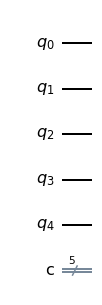

In [1]:
#initial setup
from qiskit import *
%matplotlib inline
circuit = QuantumCircuit(5,5)
circuit.draw(output = 'mpl')

In [2]:
# random number gen
import random
random.seed()

#limited to 5 qubits
genVal0 = random.randrange(2)
genVal1 = random.randrange(2)
genVal2 = random.randrange(2)
genVal3 = random.randrange(2)

gen4Bit = str(genVal0) + str(genVal1) + str(genVal2) + str(genVal3)

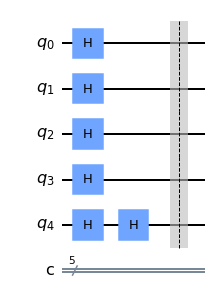

In [3]:
# I don't know what to make, the time I have for this project is nowhere near enough for "Qpong"
# I guess I could mod the Bernstein-Vazirani but with 0 detection instead of 1
# as well as integration of a random generator
# the limited qubit count is strange to work with as well, could Qpong even fit here?
# I also would rather focus on the slides than a program
circuit.h(range(len(gen4Bit)))
circuit.h(len(gen4Bit))
circuit.h(len(gen4Bit))
circuit.barrier()
circuit.draw(output = 'mpl')

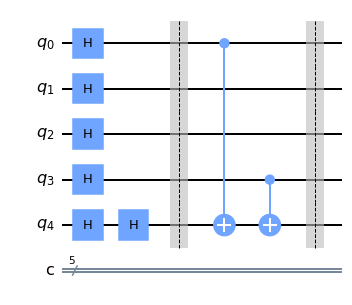

In [4]:
# swap to 0 instead of 1
for ii, yesno in enumerate(reversed(gen4Bit)):
    if yesno == '0':
        pass
    else:
        circuit.cx(ii, len(gen4Bit))


circuit.barrier()
circuit.draw(output = 'mpl')

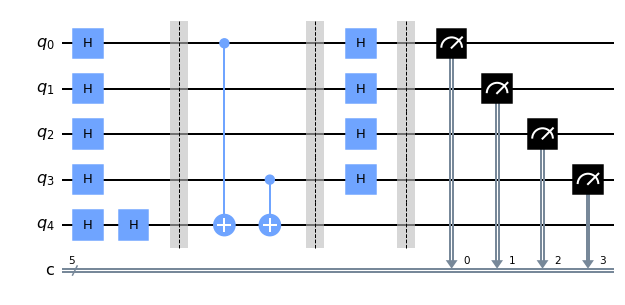

In [5]:
circuit.h(range(len(gen4Bit)))

circuit.barrier()

circuit.measure(range(len(gen4Bit)), range(len(gen4Bit)))
circuit.draw(output = 'mpl')

In [6]:
#IBM accessor
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

In [7]:
device = least_busy( # selects least busy machine, yoinked from quskit
    provider.backends( # so I don't have to swap if it gets busy
        filters = lambda x: not x.configuration().simulator
    )
)
print(f'Running on {device.name()}')

Running on ibmq_quito


In [8]:
transpiled_qc = transpile(circuit, device)

from qiskit.tools import job_monitor # job monitor
job = device.run(transpiled_qc)
job_monitor(job)

Job Status: job has successfully run


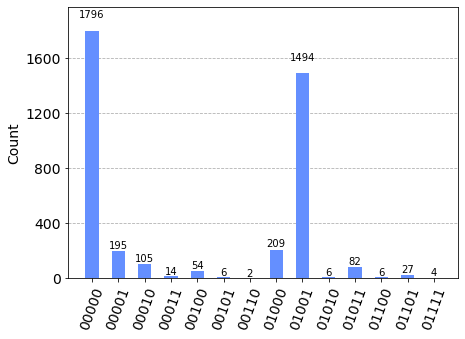

In [9]:
from qiskit.visualization import plot_histogram # printout
plot_histogram(job.result().get_counts())

In [10]:
#cutoff first 0 and compare

# how interesting to see that 
# it still detects 00000 even 
# though the generated value 
# is something else

# maybe it's the excessive H-Gates that are used in algorithm
# resulting in superpositions?

print(genVal0, genVal1, genVal2, genVal3)
print(gen4Bit)

1 0 0 1
1001
